# Import all the necessary packages

In [11]:
import pandas as pd
import glob
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Load the data

In [2]:
import numpy as np
import os

# List all files in dir
files = os.listdir('/Users/annastonek/Desktop/Studium Unterlagen/AI_ML_Climate_Change/LamaH-CE/A_basins_total_upstrm/2_timeseries/daily')

# Select 0.5 of the files randomly 
random_files = np.random.choice(files, 100)
random_files

array(['ID_123.csv', 'ID_733.csv', 'ID_843.csv', 'ID_871.csv',
       'ID_387.csv', 'ID_600.csv', 'ID_474.csv', 'ID_8.csv', 'ID_509.csv',
       'ID_519.csv', 'ID_676.csv', 'ID_360.csv', 'ID_361.csv',
       'ID_827.csv', 'ID_554.csv', 'ID_290.csv', 'ID_742.csv',
       'ID_667.csv', 'ID_89.csv', 'ID_690.csv', 'ID_493.csv',
       'ID_171.csv', 'ID_665.csv', 'ID_600.csv', 'ID_137.csv',
       'ID_874.csv', 'ID_188.csv', 'ID_86.csv', 'ID_301.csv',
       'ID_388.csv', 'ID_304.csv', 'ID_156.csv', 'ID_750.csv',
       'ID_474.csv', 'ID_70.csv', 'ID_24.csv', 'ID_517.csv', 'ID_561.csv',
       'ID_570.csv', 'ID_773.csv', 'ID_621.csv', 'ID_869.csv',
       'ID_760.csv', 'ID_380.csv', 'ID_542.csv', 'ID_514.csv',
       'ID_234.csv', 'ID_382.csv', 'ID_259.csv', 'ID_72.csv',
       'ID_286.csv', 'ID_867.csv', 'ID_879.csv', 'ID_786.csv',
       'ID_712.csv', 'ID_49.csv', 'ID_713.csv', 'ID_437.csv',
       'ID_393.csv', 'ID_834.csv', 'ID_121.csv', 'ID_720.csv',
       'ID_715.csv', 'ID_583.csv', 

In [3]:
# Get CSV files list from a folder
path = '/Users/annastonek/Desktop/Studium Unterlagen/AI_ML_Climate_Change/LamaH-CE/A_basins_total_upstrm/2_timeseries/daily/'
csv_files = []
for x in random_files:
    csv_files.append(os.path.join(path, x))

# Read each CSV file into DataFrame
# This creates a list of dataframes
counter = 0
df_list = []
for file in csv_files:
    aux = pd.read_csv(file, sep=';')
    aux['Region'] = counter
    df_list.append(aux)
    counter = counter + 1

# Pipeline

Now, we will create a regression tree from every dataset in the list and calculate the predictions.

In [25]:
predictions = []
target_values = []
mses = []
feature_importances = []
for df in df_list:
    # separate the target column from the feature columns
    y = df[['prec']]
    X = df.drop(['prec', '2m_temp_min', '2m_temp_max', '2m_dp_temp_min', '2m_dp_temp_mean', '2m_dp_temp_max'], axis=1)
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # preprocessing - scale the data
    scaler = MinMaxScaler()
    X_train[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']] = scaler.fit_transform(X_train[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']])

    

    X_test[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']] = scaler.transform(X_test[['2m_temp_mean', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4']])

    
    
    #build tree
    tree = DecisionTreeRegressor().fit(X_train, y_train)
    feature_importances.append(tree.feature_importances_)
    #calculate predictions
    y_pred = tree.predict(X_test)
    
    
    mses.append(mean_squared_error(y_test, y_pred))
    predictions.append(y_pred)
    target_values.append(y_test)

# Evaluation

In [5]:
print("MSE: ", np.mean(mses))
print("RMSE: ", math.sqrt(np.mean(mses)))

MSE:  24.697335161675245
RMSE:  4.969641351413122


## Evaluation - 2nd way

In [ ]:
pred_mean = pd.DataFrame(predictions).mean()

test_mean = []
for i in range(len(target_values)):
    test_mean.append(target_values[i]['prec'])

target_mean = pd.DataFrame(test_mean).mean()

print("MSE: ", mean_squared_error(target_mean, pred_mean))
print("RMSE: ", math.sqrt(mean_squared_error(target_mean, pred_mean)))

# Feature Importance Analysis

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.DataFrame(feature_importances).T
forest_importances['features']= (['2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max',
       '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4'])

forest_importances.set_index('features', inplace=True)

sns.barplot(forest_importances.mean(axis=1)).set_title("Mean Feature Importance Over 100 Regression Trees")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation=90)
plt.show()

In [6]:
pred_mean = pd.DataFrame(predictions).mean()

test_mean = []
for i in range(len(target_values)):
    test_mean.append(target_values[i]['prec'])

target_mean = pd.DataFrame(test_mean).mean()

print("MSE: ", mean_squared_error(target_mean, pred_mean))
print("RMSE: ", math.sqrt(mean_squared_error(target_mean, pred_mean)))

MSE:  3.7333807437552644
RMSE:  1.9321958347318897


# Feature Importance Analysis

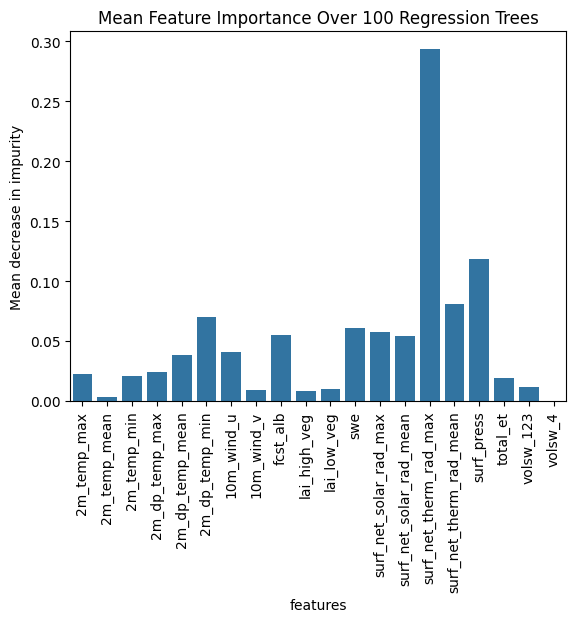

In [73]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

forest_importances = pd.DataFrame(feature_importances).T
forest_importances['features']= (['2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max',
       '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u', '10m_wind_v',
       'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'volsw_123', 'volsw_4'])

forest_importances.set_index('features', inplace=True)

sns.barplot(forest_importances.mean(axis=1)).set_title("Mean Feature Importance Over 100 Regression Trees")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation=90)
plt.show()